In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\DATA\pricing_data_2024.csv")

In [3]:
df.sample(10)

,ProductID,Location,Date,Price,Discount(%),CompetitorPrice,AdCampaign
23777,P0451,L02,2024-04-21,353.16,10,383.66,NaN
469708,P0264,L01,2024-06-26,353.08,20,415.48,TV
352624,P0424,L09,2024-06-08,353.04,5,417.68,TV
337777,P0435,L07,2024-02-12,492.29,0,517.02,NaN
458014,P0424,L03,2024-01-25,189.89,20,222.21,Online
342006,P0058,L03,2024-03-08,386.80,10,394.55,NaN
243172,P0262,L06,2024-12-26,408.58,15,387.06,Online
54876,P0259,L09,2024-08-24,216.40,20,250.99,NaN
214501,P0067,L07,2024-02-09,130.05,0,152.81,TV
402842,P0033,L07,2024-02-06,113.56,5,116.41,Online


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ProductID        500000 non-null  object 
 1   Location         500000 non-null  object 
 2   Date             500000 non-null  object 
 3   Price            500000 non-null  float64
 4   Discount(%)      500000 non-null  int64  
 5   CompetitorPrice  500000 non-null  float64
 6   AdCampaign       300034 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 26.7+ MB


In [5]:
df.isnull().sum()

ProductID               0
Location                0
Date                    0
Price                   0
Discount(%)             0
CompetitorPrice         0
AdCampaign         199966
dtype: int64

In [6]:
df.shape

(500000, 7)

# filling missing values in AdCampaign

In [7]:

# Step 1: Replace blank strings with NaN
df['AdCampaign'] = df['AdCampaign'].replace('', pd.NA)

# Step 2: Get the most frequent AdCampaign per (ProductID, Location)
mode_dict = (
    df[df['AdCampaign'].notna()]
    .groupby(['ProductID', 'Location'])['AdCampaign']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
)

# Step 3: Create key tuple for lookup
df['_key'] = list(zip(df['ProductID'], df['Location']))

# Step 4: Fill missing AdCampaigns using the mode_dict
df['AdCampaign'] = df.apply(
    lambda row: mode_dict.get(row['_key']) if pd.isna(row['AdCampaign']) else row['AdCampaign'],
    axis=1
)

# Step 5: Drop temporary key column
df.drop(columns=['_key'], inplace=True)


In [8]:
df.isnull().sum()

ProductID          0
Location           0
Date               0
Price              0
Discount(%)        0
CompetitorPrice    0
AdCampaign         0
dtype: int64

In [9]:
df.sample(10)

,ProductID,Location,Date,Price,Discount(%),CompetitorPrice,AdCampaign
306834,P0323,L04,2024-12-02,128.00,5,149.42,TV
381308,P0092,L07,2024-11-20,259.47,10,296.67,Online
184995,P0220,L05,2024-08-22,110.74,10,106.30,TV
343587,P0143,L01,2024-05-14,373.80,10,361.93,TV
214759,P0318,L03,2024-11-24,156.16,15,149.65,TV
405030,P0466,L04,2024-03-02,144.56,10,132.15,TV
319768,P0319,L07,2024-08-04,460.46,15,449.40,TV
136167,P0485,L01,2024-03-25,130.18,0,118.72,TV
206886,P0289,L04,2024-07-18,444.07,15,421.94,TV
376139,P0064,L04,2024-01-19,383.64,10,440.90,TV


In [10]:
df.dtypes

ProductID           object
Location            object
Date                object
Price              float64
Discount(%)          int64
CompetitorPrice    float64
AdCampaign          object
dtype: object

# converting data types

In [11]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Optional: convert 'ProductID' and 'Location' to string explicitly
df['ProductID'] = df['ProductID'].astype(str)
df['Location'] = df['Location'].astype(str)

# Optional: convert 'AdCampaign' to category for memory optimization
df['AdCampaign'] = df['AdCampaign'].astype('category')


In [12]:
df.dtypes

ProductID                  object
Location                   object
Date               datetime64[ns]
Price                     float64
Discount(%)                 int64
CompetitorPrice           float64
AdCampaign               category
dtype: object

# Removing whitespace from the data or column

In [13]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())


# changing column name

In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')


In [118]:
df.head()

,productid,location,date,price,discount(percent),competitorprice,adcampaign
0,P0001,L01,2024-01-01,362.83,15,401.74,TV
1,P0001,L01,2024-01-02,426.86,0,417.01,Online
2,P0001,L01,2024-01-03,384.17,10,415.22,Online
3,P0001,L01,2024-01-04,362.83,15,413.71,Online
4,P0001,L01,2024-01-05,341.49,20,414.10,TV


In [15]:
print(df.isna().sum())


productid            0
location             0
date                 0
price                0
discount(percent)    0
competitorprice      0
adcampaign           0
dtype: int64


In [16]:
df.duplicated().sum()

np.int64(0)

# Checking for outliers

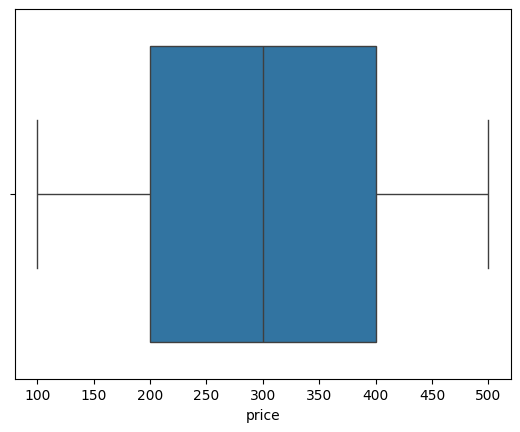

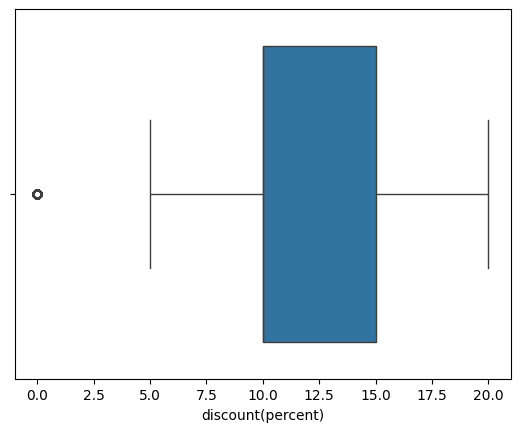

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price']); plt.show()
sns.boxplot(x=df['discount(percent)']); plt.show()


In [18]:
df[['price','competitorprice']].describe()


,price,competitorprice
count,500000.000000,500000.000000
mean,299.979836,314.974805
std,115.526177,124.494327
min,100.000000,90.240000
25%,199.770000,208.350000
50%,300.170000,312.810000
75%,400.080000,417.460000
max,500.000000,599.500000


In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR

outliers_price = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]


In [20]:
print("Total outliers in Price:", outliers_price.shape[0])


Total outliers in Price: 0


<Axes: xlabel='price'>

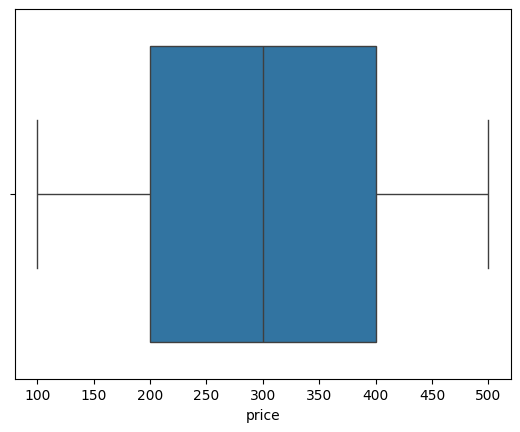

In [21]:
import seaborn as sns
sns.boxplot(x=df['price'])

In [22]:
Q1 = df['competitorprice'].quantile(0.25)
Q3 = df['competitorprice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_comp = Q1 - 1.5 * IQR
upper_bound_comp = Q3 + 1.5 * IQR

outliers_comp = df[(df['competitorprice'] < lower_bound_comp) | (df['competitorprice'] > upper_bound_comp)]


In [23]:
print("Total outliers in Price:", outliers_comp.shape[0])


Total outliers in Price: 0


# Standardize AdCampaign values (optional)

In [24]:
df['adcampaign'] = df['adcampaign'].str.lower().str.title()
# For example: "tv", "TV" → "Tv"


In [129]:
df.head()

,productid,location,date,price,discount(percent),competitorprice,adcampaign
0,P0001,L01,2024-01-01,362.83,15,401.74,Tv
1,P0001,L01,2024-01-02,426.86,0,417.01,Online
2,P0001,L01,2024-01-03,384.17,10,415.22,Online
3,P0001,L01,2024-01-04,362.83,15,413.71,Online
4,P0001,L01,2024-01-05,341.49,20,414.10,Tv


In [25]:
df.rename(columns={'discount(percent)': 'discount_percent'}, inplace=True)


In [26]:
(df['price'] < 0).sum()

np.int64(0)

In [27]:
(df['discount_percent'] < 0).sum()

np.int64(0)

In [28]:
(df['competitorprice'] < 0).sum()


np.int64(0)

In [29]:
df[df['competitorprice'] < 0][['productid', 'location', 'price', 'competitorprice']]


,productid,location,price,competitorprice


In [30]:
df['competitorprice'].describe()


count    500000.000000
mean        314.974805
std         124.494327
min          90.240000
25%         208.350000
50%         312.810000
75%         417.460000
max         599.500000
Name: competitorprice, dtype: float64

In [31]:
df['competitorprice'].unique()


array([555.19, 459.64, 456.95, ..., 586.73, 585.17, 583.06],
      shape=(49336,))

In [32]:
filtered_rows = df[(df['competitorprice'] < 20)]


In [33]:
filtered_rows

,productid,location,date,price,discount_percent,competitorprice,adcampaign


In [34]:
filtered_rows1 = df[(df['productid'] == 'P0253') & (df['location'] == 'L03')]



In [35]:
filtered_rows1

,productid,location,date,price,discount_percent,competitorprice,adcampaign
14,P0253,L03,2024-01-14,126.47,0,145.01,Online
10056,P0253,L03,2024-12-28,301.15,10,333.49,Online
11529,P0253,L03,2024-09-07,116.01,5,130.91,Online
19389,P0253,L03,2024-01-16,289.57,5,332.60,Tv
23842,P0253,L03,2024-09-21,176.19,15,208.04,Online
...,...,...,...,...,...,...,...
462927,P0253,L03,2024-11-23,412.62,10,424.38,Tv
462982,P0253,L03,2024-04-03,479.96,10,499.10,Tv
486892,P0253,L03,2024-04-09,232.65,15,219.27,Tv
489362,P0253,L03,2024-02-22,355.15,5,394.50,Tv


# filling values in CompetitorPrice which doesnt make any sense

In [36]:
# Step 1: Filter those rows
mask = (df['productid'] == 'P0253') & (df['location'] == 'L03')

# Step 2: Calculate mean of CompetitorPrice for that group
mean_value = df.loc[mask, 'competitorprice'].mean()

# Step 3: Replace values less than 60 with mean
df.loc[mask & (df['competitorprice'] < 60), 'competitorprice'] = mean_value


In [37]:
filtered_rows3 = df[(df['productid'] == 'P0458') & (df['location'] == 'L06')]

In [38]:
filtered_rows3['competitorprice'].mean()

np.float64(316.8834782608696)

In [39]:
filtered_rows3

,productid,location,date,price,discount_percent,competitorprice,adcampaign
24679,P0458,L06,2024-08-29,379.48,10,397.66,Tv
26057,P0458,L06,2024-12-28,124.13,10,129.32,Tv
28615,P0458,L06,2024-12-28,357.22,0,324.80,Tv
40273,P0458,L06,2024-10-21,173.96,10,163.59,Tv
49123,P0458,L06,2024-02-07,244.50,20,241.18,Tv
...,...,...,...,...,...,...,...
476092,P0458,L06,2024-10-27,210.18,10,250.32,Online
480122,P0458,L06,2024-01-29,321.12,15,358.25,Online
482101,P0458,L06,2024-12-29,418.72,10,448.61,Tv
482244,P0458,L06,2024-07-22,286.42,20,297.68,Online


In [40]:
# Step 1: Filter those rows
mask = (df['productid'] == 'P0458') & (df['location'] == 'L06')

# Step 2: Calculate mean of CompetitorPrice for that group
mean_value = df.loc[mask, 'competitorprice'].mean()

# Step 3: Replace values less than 60 with mean
df.loc[mask & (df['competitorprice'] < 30), 'competitorprice'] = mean_value


In [41]:
df['competitorprice'] = df['competitorprice'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)


In [42]:
df.sample(10)

,productid,location,date,price,discount_percent,competitorprice,adcampaign
424906,P0227,L05,2024-12-06,264.49,0,284.64,Tv
253973,P0339,L08,2024-06-25,132.61,10,123.10,Tv
243050,P0055,L03,2024-09-28,333.37,10,381.57,Online
427142,P0495,L01,2024-09-15,498.94,15,562.96,Tv
39697,P0038,L03,2024-11-16,218.10,0,197.67,Online
308149,P0423,L02,2024-06-05,330.81,0,375.54,Tv
106804,P0440,L06,2024-06-29,231.77,10,277.02,Tv
273870,P0321,L06,2024-06-07,412.31,10,472.69,Online
85605,P0124,L10,2024-02-29,414.14,20,489.24,Tv
337956,P0357,L07,2024-04-21,437.68,20,517.76,Tv


In [43]:
df[(df['productid']=='P0458') & (df['location']=="L06")]

,productid,location,date,price,discount_percent,competitorprice,adcampaign
24679,P0458,L06,2024-08-29,379.48,10,397.66,Tv
26057,P0458,L06,2024-12-28,124.13,10,129.32,Tv
28615,P0458,L06,2024-12-28,357.22,0,324.80,Tv
40273,P0458,L06,2024-10-21,173.96,10,163.59,Tv
49123,P0458,L06,2024-02-07,244.50,20,241.18,Tv
...,...,...,...,...,...,...,...
476092,P0458,L06,2024-10-27,210.18,10,250.32,Online
480122,P0458,L06,2024-01-29,321.12,15,358.25,Online
482101,P0458,L06,2024-12-29,418.72,10,448.61,Tv
482244,P0458,L06,2024-07-22,286.42,20,297.68,Online


In [44]:
# Find invalid discounts
invalid_discounts = df[(df['discount_percent'] < 0) | (df['discount_percent'] > 100)]
print(f"Invalid Discount Rows: {len(invalid_discounts)}")

# Optional: View them
# print(invalid_discounts)


Invalid Discount Rows: 0


In [45]:
df['finalprice'] = df['price'] * (1 - df['discount_percent'] / 100)
df['finalprice'] = df['finalprice'].round(2)


In [46]:
df.head()

,productid,location,date,price,discount_percent,competitorprice,adcampaign,finalprice
0,P0047,L06,2024-08-28,469.01,10,555.19,Online,422.11
1,P0225,L06,2024-06-07,438.49,15,459.64,Tv,372.72
2,P0172,L10,2024-06-26,403.58,15,456.95,Tv,343.04
3,P0238,L04,2024-04-30,156.80,10,170.50,Online,141.12
4,P0052,L04,2024-01-21,288.91,15,284.99,Tv,245.57


In [47]:
df.dtypes

productid                   object
location                    object
date                datetime64[ns]
price                      float64
discount_percent             int64
competitorprice            float64
adcampaign                  object
finalprice                 float64
dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   productid         500000 non-null  object        
 1   location          500000 non-null  object        
 2   date              500000 non-null  datetime64[ns]
 3   price             500000 non-null  float64       
 4   discount_percent  500000 non-null  int64         
 5   competitorprice   500000 non-null  float64       
 6   adcampaign        500000 non-null  object        
 7   finalprice        500000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 30.5+ MB


In [50]:
df.to_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\pricing_data_Cleaned.csv.csv",index=False)